In [1]:
import numpy as np
import scipy.signal as ss
import scipy.fft as sf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def exp(f, N, fs):
    T = 1.0 / fs
    x = np.linspace(0.0, N*T, N, endpoint=False)
    return np.exp(f * 1.j * 2.0 * np.pi * x)

In [9]:
def fft(y, fs):
    N = len(y)
    T = 1.0 / fs
    wf = ss.blackman(N)
    yf = sf.fft(y * wf)
    yf = 2.0 / N * np.abs(yf)
    xf = sf.fftfreq(N, T)
    return yf, xf

In [150]:
fs = 10000
N = 10000

Fs = 10000

chs = np.array([exp(-4990, N, fs), exp(0, N, fs), exp(4990, N, fs)])

N *= 3
fs *= 3

ya = ss.resample(chs[0], N) * exp(-2*(Fs/2), N, fs)
yb = ss.resample(chs[1], N) * exp(+0*(Fs/2), N, fs)
yc = ss.resample(chs[2], N) * exp(+2*(Fs/2), N, fs)

0.8399720000000002


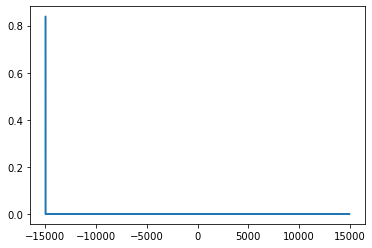

In [151]:
yf, xf = fft(ya, fs)
print(np.max(yf))
plt.plot(xf, yf)
plt.show()

0.8399720000000002


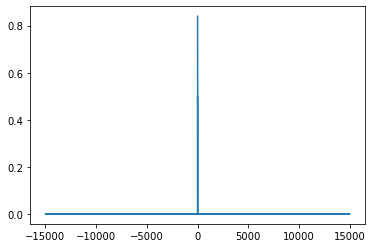

In [152]:
yf, xf = fft(yb, fs)
print(np.max(yf))
plt.plot(xf, yf)
plt.show()

0.8399720000000002


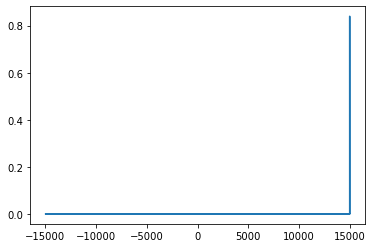

In [153]:
yf, xf = fft(yc, fs)
print(np.max(yf))
plt.plot(xf, yf)
plt.show()

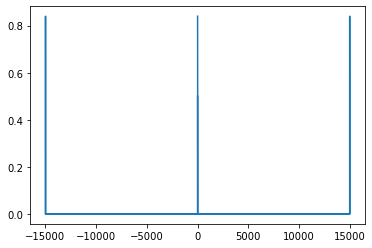

In [154]:
yf, xf = fft((ya + yb + yc), fs)
plt.plot(xf, yf)
plt.show()